NN regression (noisy data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. Generate a dataset with:
   X = 1, 2, 3, …, 500 (start=1, end=501, step=1)
   noise = np.random.normal(-0.1, 0.1)
   y = 2*X + 5 + noise

In [2]:
import numpy as np

X = np.arange(1, 501)
noise = np.random.normal(loc=-0.1, scale=0.1, size=len(X))
y = 2 * X + 5 + noise
    
data = {
    "main": X,
    "goal": y
}

df = pd.DataFrame(data)
df

,main,goal
0,1,7.008862
1,2,8.801664
2,3,11.122935
3,4,12.856325
4,5,14.791803
...,...,...
495,496,996.945004
496,497,999.004922
497,498,1001.021189
498,499,1002.853628


2. Plot X and y

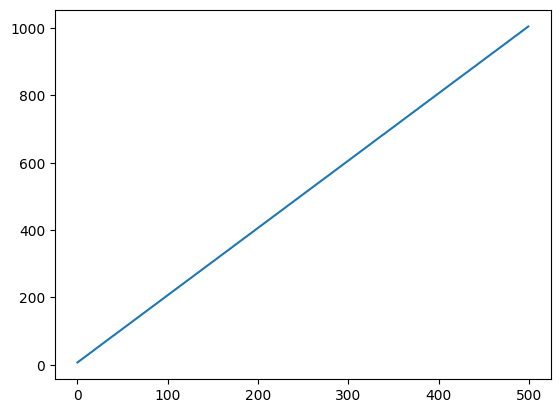

In [3]:
plt.plot(y)
plt.show()

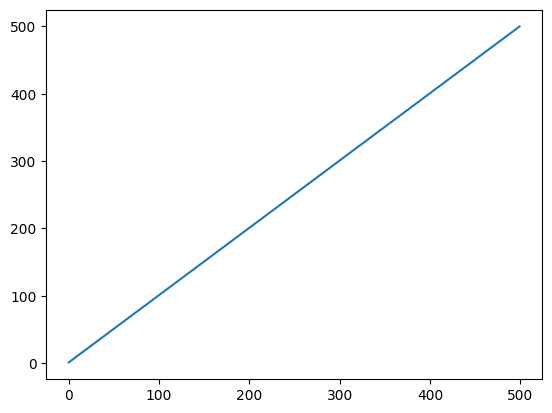

In [4]:
plt.plot(X)
plt.show()

3. Train/Test split

In [5]:
X = df[["main"]]
y = df[["goal"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

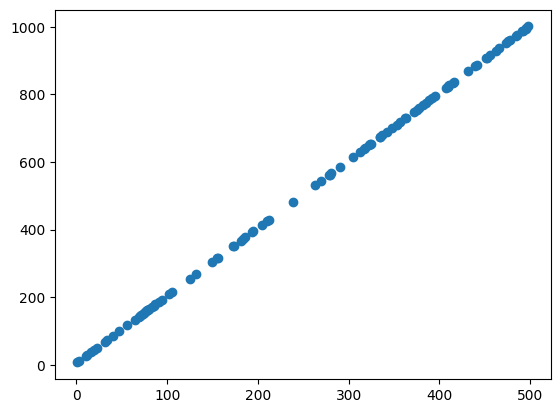

In [7]:
plt.scatter(X_test, y_test)
plt.show()

4. Class, train and test loop

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
linReg = LinearRegression().fit(X_train_scaled, y_train)
ypred_tr_lr = linReg.predict(X_train_scaled)
ypred_ts_lr = linReg.predict(X_test_scaled)

In [10]:
dtReg = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
ypred_tr_dtr = dtReg.predict(X_train)
ypred_ts_dtr = dtReg.predict(X_test)

In [11]:
rfReg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1).fit(X_train, y_train)
ypred_tr_rfr = rfReg.predict(X_train)
ypred_ts_rfr = rfReg.predict(X_test)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
gbReg = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
ypred_tr_gbr = gbReg.predict(X_train)
ypred_ts_gbr = gbReg.predict(X_test)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


5. Evaluation (with plot)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
summary = pd.DataFrame({
    "Models": ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"],
    "R² test": [
        r2_score(y_test, ypred_ts_lr), 
        r2_score(y_test, ypred_ts_dtr), 
        r2_score(y_test, ypred_ts_rfr), 
        r2_score(y_test, ypred_ts_gbr)],
    "R² train": [
        r2_score(y_train, ypred_tr_lr), 
        r2_score(y_train, ypred_tr_dtr), 
        r2_score(y_train, ypred_tr_rfr), 
        r2_score(y_train, ypred_tr_gbr)],
    "MSE test": [
        mean_squared_error(y_test, ypred_ts_lr), 
        mean_squared_error(y_test, ypred_ts_dtr), 
        mean_squared_error(y_test, ypred_ts_rfr), 
        mean_squared_error(y_test, ypred_ts_gbr)],
    "MSE train": [
        mean_squared_error(y_train, ypred_tr_lr), 
        mean_squared_error(y_train, ypred_tr_dtr), 
        mean_squared_error(y_train, ypred_tr_rfr), 
        mean_squared_error(y_train, ypred_tr_gbr)],
    "RMSE test": [
        np.sqrt(mean_squared_error(y_test, ypred_ts_lr)), 
        np.sqrt(mean_squared_error(y_test, ypred_ts_dtr)), 
        np.sqrt(mean_squared_error(y_test, ypred_ts_rfr)), 
        np.sqrt(mean_squared_error(y_test, ypred_ts_gbr))],
    "RMSE train": [
        np.sqrt(mean_squared_error(y_train, ypred_tr_lr)), 
        np.sqrt(mean_squared_error(y_train, ypred_tr_dtr)), 
        np.sqrt(mean_squared_error(y_train, ypred_tr_rfr)), 
        np.sqrt(mean_squared_error(y_train, ypred_tr_gbr))],
    "MAE test": [
        mean_absolute_error(y_test, ypred_ts_lr),
        mean_absolute_error(y_test, ypred_ts_dtr),
        mean_absolute_error(y_test, ypred_ts_rfr),
        mean_absolute_error(y_test, ypred_ts_gbr)],
    "MAE train": [
        mean_absolute_error(y_train, ypred_tr_lr),
        mean_absolute_error(y_train, ypred_tr_dtr),
        mean_absolute_error(y_train, ypred_tr_rfr),
        mean_absolute_error(y_train, ypred_tr_gbr)], 
})

print(summary)

                        Models   R² test  R² train     MSE test    MSE train  \
0            Linear Regression  1.000000  1.000000     0.013767     0.010318   
1      Decision Tree Regressor  0.984169  0.984002  1600.062294  1261.520420   
2      Random Forest Regressor  0.999980  0.999997     1.986532     0.266639   
3  Gradient Boosting Regressor  0.997948  0.997346   207.382800   209.309949   

   RMSE test  RMSE train   MAE test  MAE train  
0   0.117335    0.101577   0.093530   0.080595  
1  40.000779   35.517889  34.867043  30.629161  
2   1.409444    0.516371   1.215148   0.437051  
3  14.400792   14.467548  10.415182  10.775505  


Linear Regression:
- MAE of 0.093530 (test) and 0.080595 (train) means that, on average, the model's predictions are approximately 0.093530 (in a test) and 0.080595 (in a train) away from the true y value.
- MSE of 0.013767 (test) and 0.010318 (train) means, on average, the squared prediction errors are approximately 0.013767 (test) and 0.010318 (train).
- An R² of 1.0000 (in both test and train) indicates that the model can explain approximately 100% of the variance in y values.
- An RMSE of 0.117335 (test) and 0.101577 (train) indicates that, on average, the model's predictions have an error of approximately 0.117335 (test) and 0.101577 (train) in the same units as the y values.

the same is for other models but the values of metrics differ.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\1110387979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² test", y="Models", data=summary, palette="Set2")


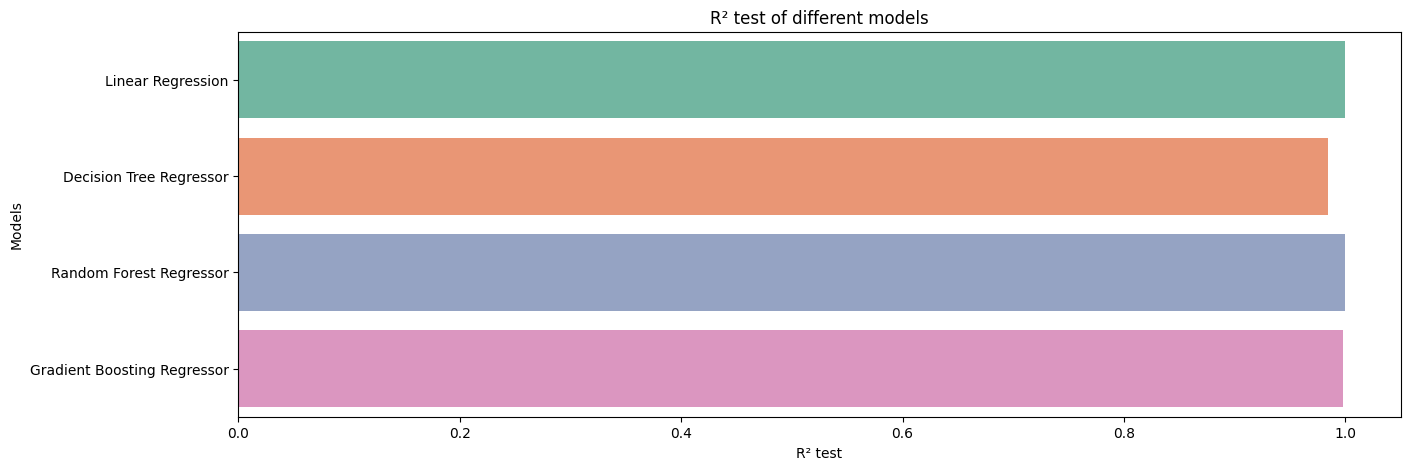

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x="R² test", y="Models", data=summary, palette="Set2")
plt.title("R² test of different models")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\4119167008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE test", y="Models", data=summary, palette="Set2")


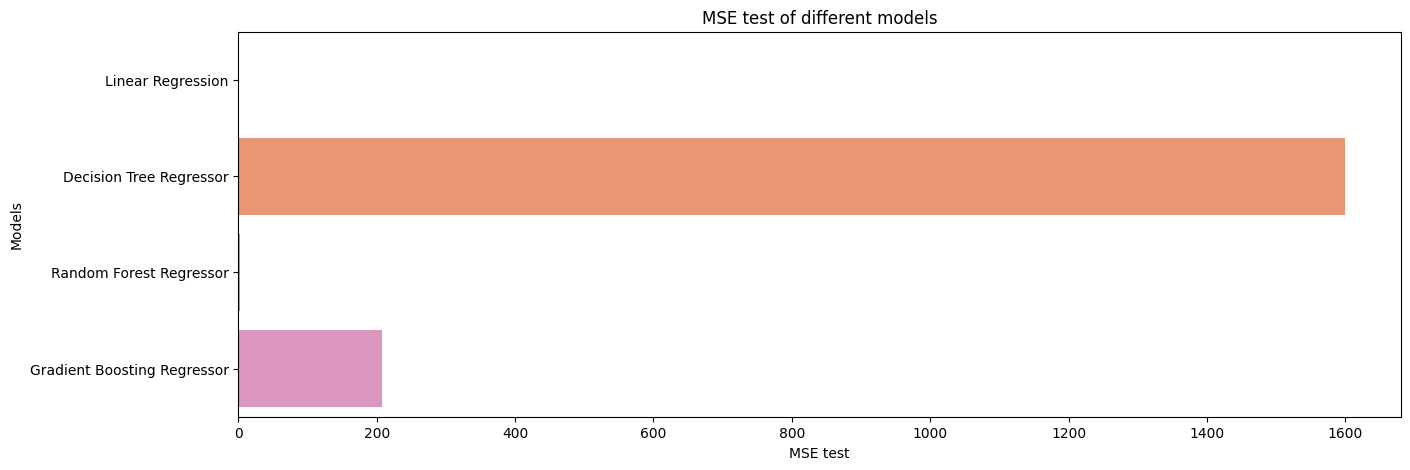

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x="MSE test", y="Models", data=summary, palette="Set2")
plt.title("MSE test of different models")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\4236449546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE test", y="Models", data=summary, palette="Set2")


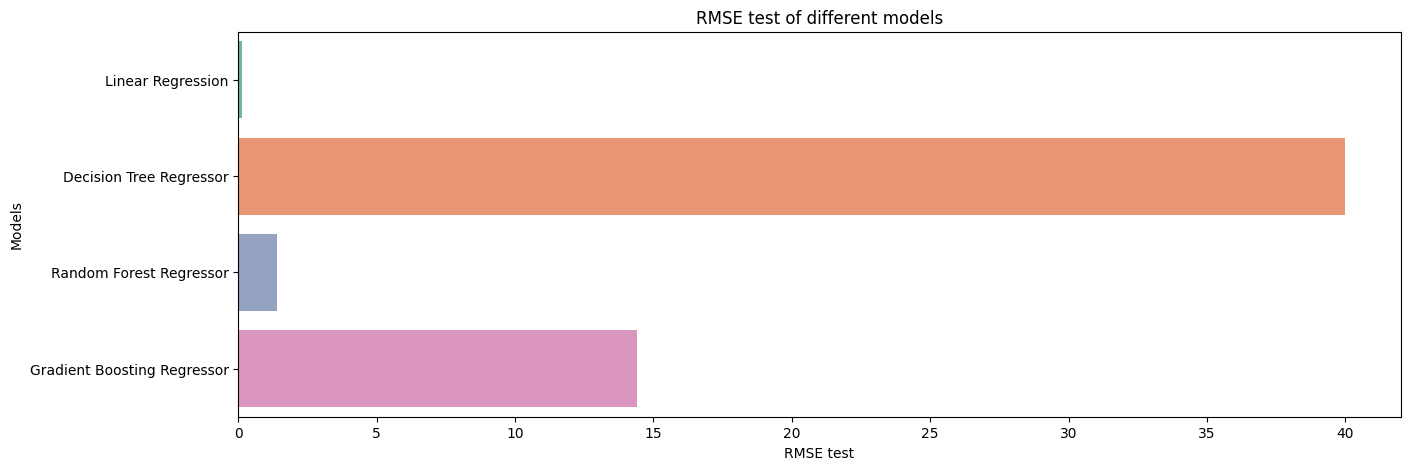

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x="RMSE test", y="Models", data=summary, palette="Set2")
plt.title("RMSE test of different models")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7432\1842477267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MAE test", y="Models", data=summary, palette="Set2")


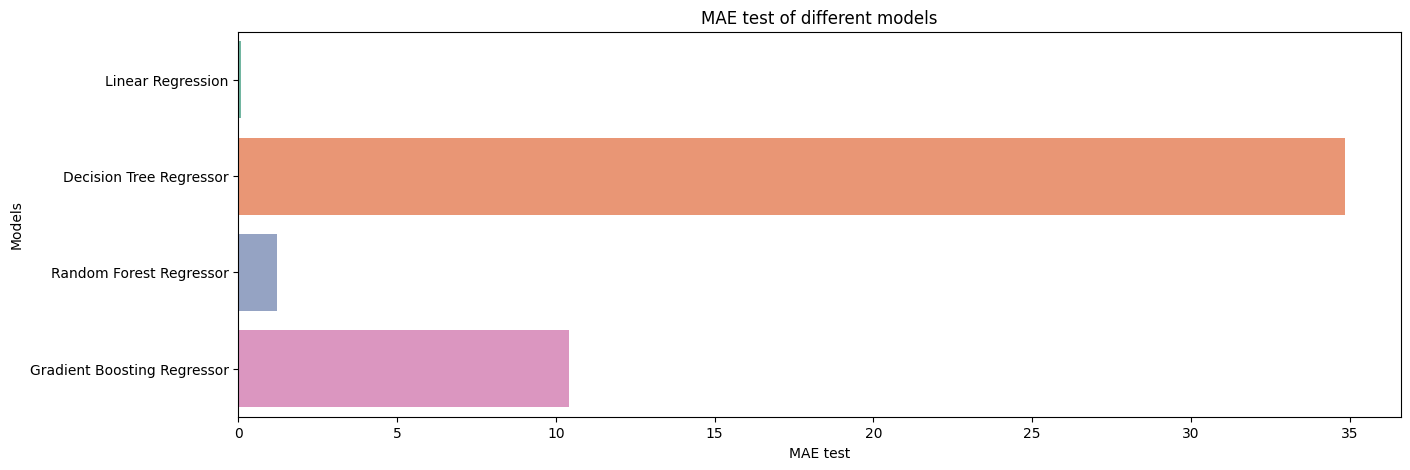

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x="MAE test", y="Models", data=summary, palette="Set2")
plt.title("MAE test of different models")
plt.show()

In [24]:
lr_row = summary[summary["Models"] == "Linear Regression"]
lr_metrics = lr_row.drop(columns=["Models"])
print(lr_row, "\n\n")
print(lr_metrics)

              Models  R² test  R² train  MSE test  MSE train  RMSE test  \
0  Linear Regression      1.0       1.0  0.013767   0.010318   0.117335   

   RMSE train  MAE test  MAE train  
0    0.101577   0.09353   0.080595   


   R² test  R² train  MSE test  MSE train  RMSE test  RMSE train  MAE test  \
0      1.0       1.0  0.013767   0.010318   0.117335    0.101577   0.09353   

   MAE train  
0   0.080595  


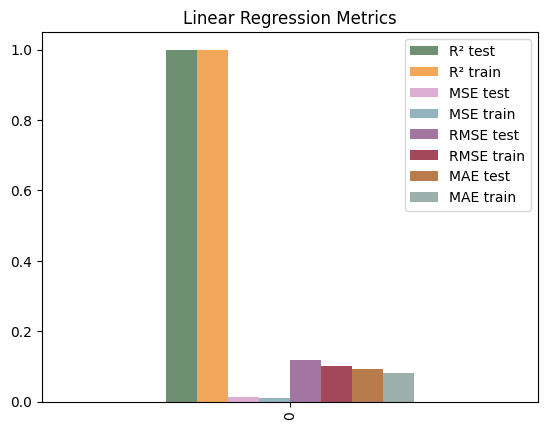

In [32]:
color = ["#6F8F72", "#F2A65A", "#DDAED3", "#94B4C1", "#A376A2", "#A3485A", "#B87C4C", "#9CAFAA"]
lr_metrics.plot(kind="bar", title="Linear Regression Metrics", color=color)
plt.show()

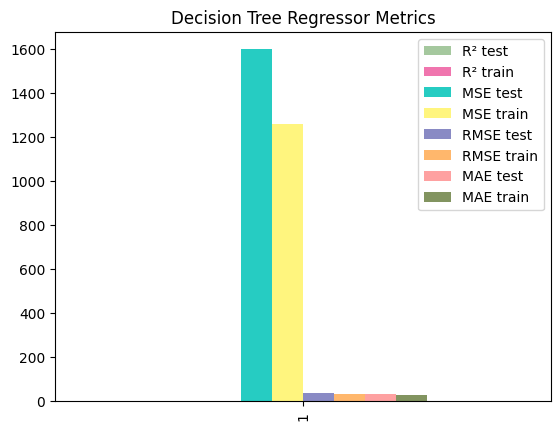

In [33]:
dt_row = summary[summary["Models"] == "Decision Tree Regressor"]
dt_metrics = dt_row.drop(columns=["Models"])

color2 = ["#A5C89E", "#F075AE", "#26CCC2", "#FFF57E", "#898AC4", "#FFB76C", "#FEA1A1", "#829460"]
dt_metrics.plot(kind="bar", title="Decision Tree Regressor Metrics", color=color2)
plt.show()

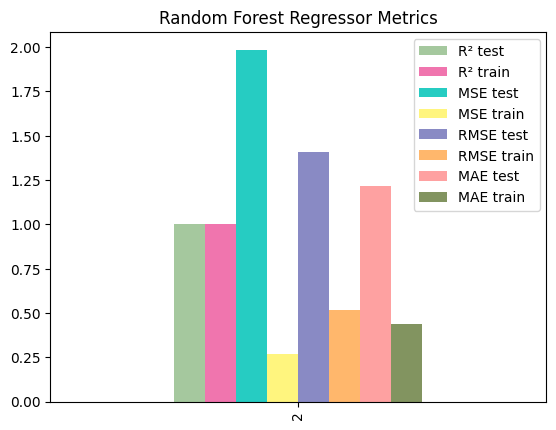

In [34]:
rf_row = summary[summary["Models"] == "Random Forest Regressor"]
rf_metrics = rf_row.drop(columns=["Models"])

rf_metrics.plot(kind="bar", title="Random Forest Regressor Metrics", color=color2)
plt.show()

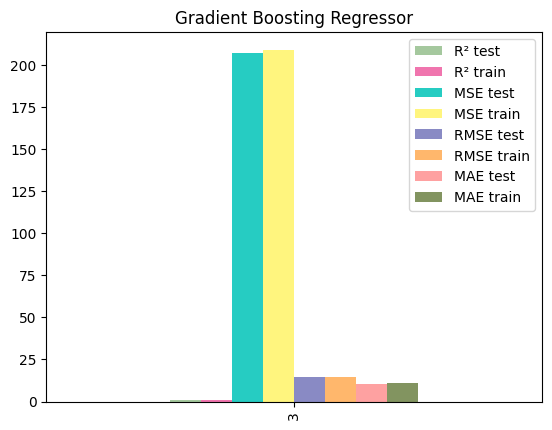

In [35]:
gb_row = summary[summary["Models"] == "Gradient Boosting Regressor"]
gb_metrics = gb_row.drop(columns=["Models"])

gb_metrics.plot(kind="bar", title="Gradient Boosting Regressor", color=color2)
plt.show()